# DSE511. Project 3. Part3. Modeling. 
## Code for Linear Regression modeling.
### Albina Jetybayeva

In this project we are trying to understand the factors contributing to housing prices in California. We hypothesis that the values of the houses will be directly related to the number of total rooms, the number of total bedrooms and median income. And inversely related to the housing median age. We will also be investigating how the price is affected by the location (longitude, latitude and and ocean proximity), the population and the number of households.

In this part, the cleaned, preprocessed dataset will be modeled using the simplest Linear Regerssion as a baseline. The Linear Regression will then be analyzed based on the importance of each feature and then tested with the extraction of only the most contributing features. After that the regression models like Lasso, Ridge and Elastic Net, which help to decrease the model complexity, that is the number of predictors, will be also tested. Each model will be discussed separately and the results will be compared.

These metrics will be used to assess the perfromance of the models:
- mean_squared_error
- mean_absolute_error
- cross_val_score
- Confidence, model.score()
- Coefficients, model.coef_

## Data import and preprocessing

In [1]:
#Importing the base libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib as mpl
mpl.style.use(['ggplot']) #use ggplot style

In [2]:
# Getting the raw data
df = pd.read_csv('housing.csv') # Notice: Raw data is in the Data folder
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
# Remove capped values of prices USD 500000
df=df[df['median_house_value'] < 490000]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
print('There are {} rows and {} columns in train'.format(df.shape[0],df.shape[1]))

There are 19608 rows and 10 columns in train


In [5]:
# As it was dsicussed in Part 1. Explanatory Data Analysis, it might be interesting to add the possibly helpful 
#attributes combinations and study their effect on modeling too

df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]
df

<ipython-input-5-305753125a34>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rooms_per_household"] = df["total_rooms"]/df["households"]
<ipython-input-5-305753125a34>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
<ipython-input-5-305753125a34>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


## Handling categorical attributes

As in this dataset there is present one categorical attribute "ocean proximity", for each category the specific number will be assigned. The categories will be changed as follows: NEAR OCEAN = 4; NEAR BAY = 3; <1H OCEAN = 2; INLAND = 1; ISLAND =0. So there will be 5 categories (0-4 numbers) in total.

In [6]:
# Asssigning numerical values to ocean proximity in the gradient order: the lower the number the further away is the house from the ocean
# this gradient is chosen for the better and easier interpretation of models results (feature importances)

df.loc[df['ocean_proximity'] == 'NEAR OCEAN', 'ocean_proximity'] = 4
df.loc[df['ocean_proximity'] == 'NEAR BAY', 'ocean_proximity'] = 3
df.loc[df['ocean_proximity'] == '<1H OCEAN', 'ocean_proximity'] = 2
df.loc[df['ocean_proximity'] == 'INLAND', 'ocean_proximity'] = 1
df.loc[df['ocean_proximity'] == 'ISLAND', 'ocean_proximity'] = 0

df

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,5.329513,0.219892,2.123209


## Data split

Now the data will be splitted in train and test set to avoid the data leakage and bias during the further preprocessing steps, which include cleaning the missing values and feature scaling.

In [7]:
# Splitting the data into training and testing sets.
train_set1, test_set1 = train_test_split(df, test_size=0.2, random_state=1)
print("Training Data", len(train_set1))
print("Testing Data", len(test_set1))

Training Data 15686
Testing Data 3922


## Data cleaning on train and test

Changing the missing values with the median on a train set.

In [8]:
# Observing missing values
missing_values_count = train_set1.isnull().sum()
missing_values_count[:]

total_cells   = np.product(train_set1.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells)*100
print('Percent of data that is missing:', percent_missing)

imputer = SimpleImputer(strategy = "median")
housing_numerical_attributes = train_set1.drop("ocean_proximity", axis = 1)
imputer.fit(housing_numerical_attributes)  
X = imputer.transform(housing_numerical_attributes)

Percent of data that is missing: 0.1431948136015457


Changing the missing values with the median (from a train set) on a test set.

In [9]:
# Observing missing values
missing_values_count = test_set1.isnull().sum()
missing_values_count[:]

total_cells   = np.product(test_set1.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells)*100
print('Percent of data that is missing:', percent_missing)

imputer = SimpleImputer(strategy = "median")
housing_numerical_attributes1 = test_set1.drop("ocean_proximity", axis = 1)
imputer.fit(housing_numerical_attributes)  
X1 = imputer.transform(housing_numerical_attributes1)

Percent of data that is missing: 0.21182285333228731


In [10]:
# Data with replaced NAN values.
# Put back the ocean proximity in train set
train_set = pd.DataFrame(X, columns = housing_numerical_attributes.columns, index = housing_numerical_attributes.index)

train_set.insert(9,"ocean_proximity",df["ocean_proximity"],True)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
2736,-115.57,32.79,50.0,1291.0,277.0,864.0,274.0,1.6667,68100.0,1,4.711679,0.214562,3.153285
17659,-121.88,37.28,33.0,2951.0,529.0,1288.0,521.0,4.1554,313100.0,2,5.664107,0.179261,2.472169
17654,-121.89,37.25,21.0,2080.0,352.0,1040.0,325.0,5.2887,264500.0,2,6.400000,0.169231,3.200000
17544,-121.87,37.34,52.0,1170.0,215.0,604.0,207.0,2.6667,325900.0,2,5.652174,0.183761,2.917874
8772,-118.34,33.80,33.0,2194.0,469.0,987.0,397.0,5.0951,318900.0,2,5.526448,0.213765,2.486146
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11575,-118.00,33.77,28.0,2401.0,503.0,1155.0,456.0,3.5139,211700.0,2,5.265351,0.209496,2.532895
18228,-122.09,37.41,18.0,1476.0,473.0,838.0,415.0,3.5750,274000.0,3,3.556627,0.320461,2.019277
5425,-118.42,34.02,34.0,2243.0,444.0,973.0,413.0,4.9676,414100.0,2,5.430993,0.197949,2.355932
12799,-121.45,38.61,32.0,2436.0,612.0,1509.0,618.0,1.0424,81400.0,1,3.941748,0.251232,2.441748


In [11]:
# Data with replaced NAN values.
# Put back the ocean proximity in test set
test_set = pd.DataFrame(X1, columns = housing_numerical_attributes1.columns, index = housing_numerical_attributes1.index)

test_set.insert(9,"ocean_proximity",df["ocean_proximity"],True)
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
11212,-117.91,33.82,29.0,1444.0,326.0,1038.0,271.0,2.3843,182900.0,2,5.328413,0.225762,3.830258
10317,-117.82,33.84,25.0,1788.0,203.0,676.0,217.0,10.1299,454300.0,2,8.239631,0.113535,3.115207
5086,-118.28,33.98,47.0,865.0,193.0,782.0,217.0,2.2411,93000.0,2,3.986175,0.223121,3.603687
7988,-118.18,33.85,38.0,3596.0,862.0,2416.0,832.0,3.6897,169800.0,2,4.322115,0.239711,2.903846
14480,-117.25,32.82,19.0,5255.0,762.0,1773.0,725.0,7.8013,474000.0,4,7.248276,0.145005,2.445517
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,-122.29,37.90,49.0,1283.0,238.0,576.0,236.0,3.3333,276800.0,3,5.436441,0.185503,2.440678
11924,-117.39,33.95,35.0,1599.0,284.0,721.0,287.0,4.1250,120700.0,1,5.571429,0.177611,2.512195
13047,-121.28,38.55,35.0,7088.0,1279.0,4885.0,1272.0,2.6981,112500.0,1,5.572327,0.180446,3.840409
10331,-117.77,33.84,5.0,4380.0,715.0,1913.0,741.0,6.7274,266400.0,2,5.910931,0.163242,2.581646


## Feature Scaling

As the attributes have very different ranges, it is recommended ro do the normalization on them, since Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. 

Standardization will be applied, which first subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. The advantage of standardization is that is is much less affected by outliers.

As scaling the target values is generally not required, these will not be scaled. So first the target labels will be dropped and then added after the nscaling.

In [12]:
train_set_without_target = train_set.drop("median_house_value", axis=1) # drop labels for training set 
train_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
2736,-115.57,32.79,50.0,1291.0,277.0,864.0,274.0,1.6667,1,4.711679,0.214562,3.153285
17659,-121.88,37.28,33.0,2951.0,529.0,1288.0,521.0,4.1554,2,5.664107,0.179261,2.472169
17654,-121.89,37.25,21.0,2080.0,352.0,1040.0,325.0,5.2887,2,6.400000,0.169231,3.200000
17544,-121.87,37.34,52.0,1170.0,215.0,604.0,207.0,2.6667,2,5.652174,0.183761,2.917874
8772,-118.34,33.80,33.0,2194.0,469.0,987.0,397.0,5.0951,2,5.526448,0.213765,2.486146
...,...,...,...,...,...,...,...,...,...,...,...,...
11575,-118.00,33.77,28.0,2401.0,503.0,1155.0,456.0,3.5139,2,5.265351,0.209496,2.532895
18228,-122.09,37.41,18.0,1476.0,473.0,838.0,415.0,3.5750,3,3.556627,0.320461,2.019277
5425,-118.42,34.02,34.0,2243.0,444.0,973.0,413.0,4.9676,2,5.430993,0.197949,2.355932
12799,-121.45,38.61,32.0,2436.0,612.0,1509.0,618.0,1.0424,1,3.941748,0.251232,2.441748


In [13]:
test_set_without_target = test_set.drop("median_house_value", axis=1) # drop labels for test set
test_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
11212,-117.91,33.82,29.0,1444.0,326.0,1038.0,271.0,2.3843,2,5.328413,0.225762,3.830258
10317,-117.82,33.84,25.0,1788.0,203.0,676.0,217.0,10.1299,2,8.239631,0.113535,3.115207
5086,-118.28,33.98,47.0,865.0,193.0,782.0,217.0,2.2411,2,3.986175,0.223121,3.603687
7988,-118.18,33.85,38.0,3596.0,862.0,2416.0,832.0,3.6897,2,4.322115,0.239711,2.903846
14480,-117.25,32.82,19.0,5255.0,762.0,1773.0,725.0,7.8013,4,7.248276,0.145005,2.445517
...,...,...,...,...,...,...,...,...,...,...,...,...
385,-122.29,37.90,49.0,1283.0,238.0,576.0,236.0,3.3333,3,5.436441,0.185503,2.440678
11924,-117.39,33.95,35.0,1599.0,284.0,721.0,287.0,4.1250,1,5.571429,0.177611,2.512195
13047,-121.28,38.55,35.0,7088.0,1279.0,4885.0,1272.0,2.6981,1,5.572327,0.180446,3.840409
10331,-117.77,33.84,5.0,4380.0,715.0,1913.0,741.0,6.7274,2,5.910931,0.163242,2.581646


In [14]:
# Creating pandas series full of zeros to store the standard deviation and the mean from the training set.
std_dev_tr= pd.Series({col:0 for col in train_set_without_target.columns}, dtype="float32")
mean_tr= pd.Series({col:0 for col in train_set_without_target.columns}, dtype="float32")

# Getting the values for the mean and standard deviation from the training dataset.
for col in train_set_without_target.columns:
    std_dev_tr[col]= train_set_without_target[col].std()
    mean_tr[col]= train_set_without_target[col].mean()
    # Changing the training data so it is normalized with the mean and standard deviation from the training set.
    train_set_without_target[col]=(train_set_without_target[col]-mean_tr[col])/std_dev_tr[col]

for col in test_set_without_target.columns:
    # Changing the testing data so it is normalized with the mean and standard deviation from the training set.
    test_set_without_target[col]=(test_set_without_target[col]-mean_tr[col])/std_dev_tr[col]

In [15]:
train_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
2736,1.987142,-1.326644,1.738389,-0.614893,-0.625995,-0.516708,-0.595592,-1.281953,-1.054676,-0.299836,-0.005576,0.003533
17659,-1.162709,0.760676,0.376473,0.155700,-0.021575,-0.135922,0.053373,0.314878,-0.021924,0.141273,-0.627446,-0.054483
17654,-1.167700,0.746729,-0.584880,-0.248629,-0.446108,-0.358646,-0.461596,1.042040,-0.021924,0.482095,-0.804145,0.007512
17544,-1.157717,0.788569,1.898615,-0.671063,-0.774701,-0.750208,-0.771628,-0.640321,-0.021924,0.135746,-0.548183,-0.016519
8772,0.604403,-0.857113,0.376473,-0.195709,-0.165485,-0.406244,-0.272424,0.917820,-0.021924,0.077517,-0.019626,-0.053292
...,...,...,...,...,...,...,...,...,...,...,...,...
11575,0.774125,-0.871060,-0.024091,-0.099617,-0.083936,-0.255367,-0.117408,-0.096730,-0.021924,-0.043408,-0.094825,-0.049310
18228,-1.267537,0.821111,-0.825218,-0.529014,-0.155891,-0.540058,-0.225131,-0.057526,1.010828,-0.834789,1.859945,-0.093059
5425,0.564468,-0.754839,0.456585,-0.172963,-0.225447,-0.418817,-0.230385,0.836012,-0.021924,0.033308,-0.298237,-0.064384
12799,-0.948059,1.378969,0.296360,-0.083370,0.177499,0.062553,0.308229,-1.682525,-1.054676,-0.656423,0.640393,-0.057074


In [16]:
train_set_without_target.insert(12,"median_house_value",train_set["median_house_value"]) #Put back the target values for train set
train_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
2736,1.987142,-1.326644,1.738389,-0.614893,-0.625995,-0.516708,-0.595592,-1.281953,-1.054676,-0.299836,-0.005576,0.003533,68100.0
17659,-1.162709,0.760676,0.376473,0.155700,-0.021575,-0.135922,0.053373,0.314878,-0.021924,0.141273,-0.627446,-0.054483,313100.0
17654,-1.167700,0.746729,-0.584880,-0.248629,-0.446108,-0.358646,-0.461596,1.042040,-0.021924,0.482095,-0.804145,0.007512,264500.0
17544,-1.157717,0.788569,1.898615,-0.671063,-0.774701,-0.750208,-0.771628,-0.640321,-0.021924,0.135746,-0.548183,-0.016519,325900.0
8772,0.604403,-0.857113,0.376473,-0.195709,-0.165485,-0.406244,-0.272424,0.917820,-0.021924,0.077517,-0.019626,-0.053292,318900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11575,0.774125,-0.871060,-0.024091,-0.099617,-0.083936,-0.255367,-0.117408,-0.096730,-0.021924,-0.043408,-0.094825,-0.049310,211700.0
18228,-1.267537,0.821111,-0.825218,-0.529014,-0.155891,-0.540058,-0.225131,-0.057526,1.010828,-0.834789,1.859945,-0.093059,274000.0
5425,0.564468,-0.754839,0.456585,-0.172963,-0.225447,-0.418817,-0.230385,0.836012,-0.021924,0.033308,-0.298237,-0.064384,414100.0
12799,-0.948059,1.378969,0.296360,-0.083370,0.177499,0.062553,0.308229,-1.682525,-1.054676,-0.656423,0.640393,-0.057074,81400.0


In [17]:
train=train_set_without_target
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
2736,1.987142,-1.326644,1.738389,-0.614893,-0.625995,-0.516708,-0.595592,-1.281953,-1.054676,-0.299836,-0.005576,0.003533,68100.0
17659,-1.162709,0.760676,0.376473,0.155700,-0.021575,-0.135922,0.053373,0.314878,-0.021924,0.141273,-0.627446,-0.054483,313100.0
17654,-1.167700,0.746729,-0.584880,-0.248629,-0.446108,-0.358646,-0.461596,1.042040,-0.021924,0.482095,-0.804145,0.007512,264500.0
17544,-1.157717,0.788569,1.898615,-0.671063,-0.774701,-0.750208,-0.771628,-0.640321,-0.021924,0.135746,-0.548183,-0.016519,325900.0
8772,0.604403,-0.857113,0.376473,-0.195709,-0.165485,-0.406244,-0.272424,0.917820,-0.021924,0.077517,-0.019626,-0.053292,318900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11575,0.774125,-0.871060,-0.024091,-0.099617,-0.083936,-0.255367,-0.117408,-0.096730,-0.021924,-0.043408,-0.094825,-0.049310,211700.0
18228,-1.267537,0.821111,-0.825218,-0.529014,-0.155891,-0.540058,-0.225131,-0.057526,1.010828,-0.834789,1.859945,-0.093059,274000.0
5425,0.564468,-0.754839,0.456585,-0.172963,-0.225447,-0.418817,-0.230385,0.836012,-0.021924,0.033308,-0.298237,-0.064384,414100.0
12799,-0.948059,1.378969,0.296360,-0.083370,0.177499,0.062553,0.308229,-1.682525,-1.054676,-0.656423,0.640393,-0.057074,81400.0


In [18]:
test_set_without_target.insert(12,"median_house_value",test_set["median_house_value"]) #Put back the target values for test set
test_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
11212,0.819052,-0.847816,0.056022,-0.543869,-0.508469,-0.360442,-0.603475,-0.821518,-0.021924,-0.014201,0.191714,0.061195,182900.0
10317,0.863978,-0.838518,-0.264429,-0.384179,-0.803483,-0.685546,-0.745354,4.148312,-0.021924,1.334104,-1.785296,0.000289,454300.0
5086,0.634354,-0.773435,1.498051,-0.812648,-0.827468,-0.590350,-0.745354,-0.913400,-0.021924,-0.635847,0.145201,0.041896,93000.0
7988,0.684272,-0.833869,0.777036,0.455117,0.777122,0.877110,0.870491,0.016069,-0.021924,-0.480259,0.437442,-0.017714,169800.0
14480,1.148513,-1.312698,-0.745106,1.225246,0.537273,0.299646,0.589360,2.654206,2.04358,0.874967,-1.230914,-0.056753,474000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,-1.367374,1.048903,1.658276,-0.618607,-0.719536,-0.775354,-0.695433,-0.212608,1.010828,0.035831,-0.517495,-0.057165,276800.0
11924,1.078627,-0.787381,0.536698,-0.471916,-0.609205,-0.645133,-0.561436,0.295372,-1.054676,0.098349,-0.656517,-0.051074,120700.0
13047,-0.863198,1.351076,0.536698,2.076147,1.777292,3.094466,2.026542,-0.620174,-1.054676,0.098766,-0.606578,0.062060,112500.0
10331,0.888937,-0.838518,-1.866684,0.819060,0.424544,0.425377,0.631398,1.965157,-0.021924,0.255587,-0.909643,-0.045158,266400.0


In [19]:
test=test_set_without_target
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
11212,0.819052,-0.847816,0.056022,-0.543869,-0.508469,-0.360442,-0.603475,-0.821518,-0.021924,-0.014201,0.191714,0.061195,182900.0
10317,0.863978,-0.838518,-0.264429,-0.384179,-0.803483,-0.685546,-0.745354,4.148312,-0.021924,1.334104,-1.785296,0.000289,454300.0
5086,0.634354,-0.773435,1.498051,-0.812648,-0.827468,-0.590350,-0.745354,-0.913400,-0.021924,-0.635847,0.145201,0.041896,93000.0
7988,0.684272,-0.833869,0.777036,0.455117,0.777122,0.877110,0.870491,0.016069,-0.021924,-0.480259,0.437442,-0.017714,169800.0
14480,1.148513,-1.312698,-0.745106,1.225246,0.537273,0.299646,0.589360,2.654206,2.04358,0.874967,-1.230914,-0.056753,474000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,-1.367374,1.048903,1.658276,-0.618607,-0.719536,-0.775354,-0.695433,-0.212608,1.010828,0.035831,-0.517495,-0.057165,276800.0
11924,1.078627,-0.787381,0.536698,-0.471916,-0.609205,-0.645133,-0.561436,0.295372,-1.054676,0.098349,-0.656517,-0.051074,120700.0
13047,-0.863198,1.351076,0.536698,2.076147,1.777292,3.094466,2.026542,-0.620174,-1.054676,0.098766,-0.606578,0.062060,112500.0
10331,0.888937,-0.838518,-1.866684,0.819060,0.424544,0.425377,0.631398,1.965157,-0.021924,0.255587,-0.909643,-0.045158,266400.0


## Modeling Linear Regression

In [20]:
# First, we will split between features and target value (labels) for train set

housing = train.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = train["median_house_value"].copy()

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
2736,1.987142,-1.326644,1.738389,-0.614893,-0.625995,-0.516708,-0.595592,-1.281953,-1.054676,-0.299836,-0.005576,0.003533
17659,-1.162709,0.760676,0.376473,0.155700,-0.021575,-0.135922,0.053373,0.314878,-0.021924,0.141273,-0.627446,-0.054483
17654,-1.167700,0.746729,-0.584880,-0.248629,-0.446108,-0.358646,-0.461596,1.042040,-0.021924,0.482095,-0.804145,0.007512
17544,-1.157717,0.788569,1.898615,-0.671063,-0.774701,-0.750208,-0.771628,-0.640321,-0.021924,0.135746,-0.548183,-0.016519
8772,0.604403,-0.857113,0.376473,-0.195709,-0.165485,-0.406244,-0.272424,0.917820,-0.021924,0.077517,-0.019626,-0.053292
...,...,...,...,...,...,...,...,...,...,...,...,...
11575,0.774125,-0.871060,-0.024091,-0.099617,-0.083936,-0.255367,-0.117408,-0.096730,-0.021924,-0.043408,-0.094825,-0.049310
18228,-1.267537,0.821111,-0.825218,-0.529014,-0.155891,-0.540058,-0.225131,-0.057526,1.010828,-0.834789,1.859945,-0.093059
5425,0.564468,-0.754839,0.456585,-0.172963,-0.225447,-0.418817,-0.230385,0.836012,-0.021924,0.033308,-0.298237,-0.064384
12799,-0.948059,1.378969,0.296360,-0.083370,0.177499,0.062553,0.308229,-1.682525,-1.054676,-0.656423,0.640393,-0.057074


In [21]:
housing_labels

2736      68100.0
17659    313100.0
17654    264500.0
17544    325900.0
8772     318900.0
           ...   
11575    211700.0
18228    274000.0
5425     414100.0
12799     81400.0
236      122000.0
Name: median_house_value, Length: 15686, dtype: float64

In [22]:
# Second, we will split between features and target value (labels) for test set

housing_t = test.drop("median_house_value", axis=1) # drop labels for test set
housing_labels_t = test["median_house_value"].copy()

housing_t

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
11212,0.819052,-0.847816,0.056022,-0.543869,-0.508469,-0.360442,-0.603475,-0.821518,-0.021924,-0.014201,0.191714,0.061195
10317,0.863978,-0.838518,-0.264429,-0.384179,-0.803483,-0.685546,-0.745354,4.148312,-0.021924,1.334104,-1.785296,0.000289
5086,0.634354,-0.773435,1.498051,-0.812648,-0.827468,-0.590350,-0.745354,-0.913400,-0.021924,-0.635847,0.145201,0.041896
7988,0.684272,-0.833869,0.777036,0.455117,0.777122,0.877110,0.870491,0.016069,-0.021924,-0.480259,0.437442,-0.017714
14480,1.148513,-1.312698,-0.745106,1.225246,0.537273,0.299646,0.589360,2.654206,2.04358,0.874967,-1.230914,-0.056753
...,...,...,...,...,...,...,...,...,...,...,...,...
385,-1.367374,1.048903,1.658276,-0.618607,-0.719536,-0.775354,-0.695433,-0.212608,1.010828,0.035831,-0.517495,-0.057165
11924,1.078627,-0.787381,0.536698,-0.471916,-0.609205,-0.645133,-0.561436,0.295372,-1.054676,0.098349,-0.656517,-0.051074
13047,-0.863198,1.351076,0.536698,2.076147,1.777292,3.094466,2.026542,-0.620174,-1.054676,0.098766,-0.606578,0.062060
10331,0.888937,-0.838518,-1.866684,0.819060,0.424544,0.425377,0.631398,1.965157,-0.021924,0.255587,-0.909643,-0.045158


In [23]:
housing_labels_t

11212    182900.0
10317    454300.0
5086      93000.0
7988     169800.0
14480    474000.0
           ...   
385      276800.0
11924    120700.0
13047    112500.0
10331    266400.0
14428    212500.0
Name: median_house_value, Length: 3922, dtype: float64

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [24]:
%%time

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing, housing_labels)


Wall time: 20.9 ms


LinearRegression()

In [25]:
%%time
housing_pred = lin_reg.predict(housing_t)

Wall time: 7.98 ms


First metrics that will be used to asses the performance of the model will be the mean_squared_error. This function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss (https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). In statistics, the mean squared error (MSE)[1] or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. 

In [26]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(housing_labels_t, housing_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

60044.46010158723

It is clear that that the error is quite large. Considering that the price ranges between USD 120,000 and USD 265,000, the typical prediction error of USD 68,628 is too big. This is an example of a model underfitting the training data. When this happens it might be a result of the features not providing enough information to make good predictions, or that the model is not powerful
enough. The main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model. Linear Regression model is not regularized, so this rules out the last option. However, playing with features (removing or adding some) can be done later.

another metrics that can be used is the mean absolute error. In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. It is thus an arithmetic average of the absolute errors |e(i)|=|y(i)-x(i)|, where y(i) is the prediction and x(i) is the true value. 

In [27]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels_t, housing_pred)
lin_mae

43727.45803904243

As it can be seen, MAE is also quite high for this linear regression model.

Another helpful metrics used for the model evaluation, especially for trees models, is the cross validation score. This function randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores. Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value). Cross-validation allows to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation).

In [28]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [29]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [59931.01532052 57974.09425051 59152.47632566 58008.75076535
 59142.8876801  62916.39638752 59459.63512689 56840.60724524
 62181.12339069 61080.44370462]
Mean: 59668.743019709786
Standard deviation: 1820.2619331357644


Another metrics for the model performance is the model score. The coefficient of determination R^2 is defined as (1-u/v), where u is the residual sum of squares ((y_true - y_pred)** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 

In [30]:
lr_confidence = lin_reg.score(housing_t, housing_labels_t)
print("lr confidence: ", lr_confidence)

lr confidence:  0.6144529265025959


For this model the score is 0.63, which is not high as expected from the other previous metrics.

Text(0, 0.5, 'Predicted')

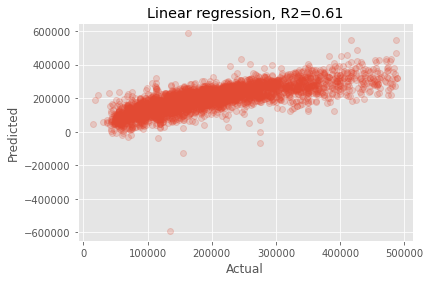

In [31]:
#Visualize the predicted and actual prices
from sklearn.metrics import r2_score

housing_pred_lr = lin_reg.predict(housing_t)
plt.figure()
plt.errorbar(housing_labels_t, housing_pred_lr, fmt='o', alpha=0.2)
plt.title('Linear regression, R2=%.2f' % r2_score(housing_labels_t, housing_pred_lr))
plt.xlabel('Actual')
plt.ylabel('Predicted')

As it was seen the values of prices were capped with USD 500,000 median_house_value. The capped house value may be a problem for a precise modeling since it is the target attribute (labels). The Machine Learning algorithms may learn that prices never go beyond that limit. To check how the model will perform without these capped prices those values will be removed from the training set (and also from the test set, since the system should not be evaluated poorly if it predicts values beyond USD 500,000) and tested in a separate code.

To evaluate the features importance of linear regression model, the coefficients of the model will be extracted. Regression coefficients are estimates of the unknown population parameters and describe the relationship between a predictor variable and the response.The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable. A positive sign indicates that as the predictor variable increases, the response variable also increases.
A negative sign indicates that as the predictor variable increases, the response variable decreases. The coefficient value represents the mean change in the response given a one unit change in the predictor. So the larger the coefficient can be interpreted as more weight and siginifcance is for this feature.

Feature: 0, Score: -65357.70457
Feature: 1, Score: -68557.26387
Feature: 2, Score: 12174.30116
Feature: 3, Score: 1867.96262
Feature: 4, Score: -1366.48562
Feature: 5, Score: -39800.17945
Feature: 6, Score: 44435.99069
Feature: 7, Score: 64690.97703
Feature: 8, Score: 6854.34183
Feature: 9, Score: 7391.41187
Feature: 10, Score: 17644.54663
Feature: 11, Score: 312.61939


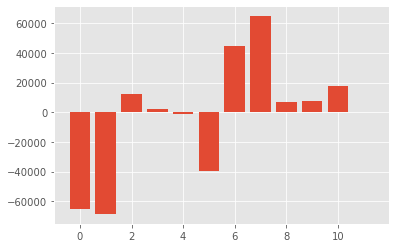

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot']) #use ggplot style

importance = lin_reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [33]:
#To get the exact names of features create the table
coef_table = pd.DataFrame(list(housing.columns)).copy()
coef_table.columns = ['Features']
coef_table.insert(len(coef_table.columns),"Coefs",lin_reg.coef_.transpose())
coef_table

,Features,Coefs
0,longitude,-65357.704569
1,latitude,-68557.263868
2,housing_median_age,12174.301161
3,total_rooms,1867.962624
4,total_bedrooms,-1366.485622
5,population,-39800.179455
6,households,44435.990687
7,median_income,64690.977032
8,ocean_proximity,6854.341828
9,rooms_per_household,7391.411874


In [34]:
coef_table_sorted=coef_table.sort_values(by='Coefs')

<Figure size 432x288 with 0 Axes>

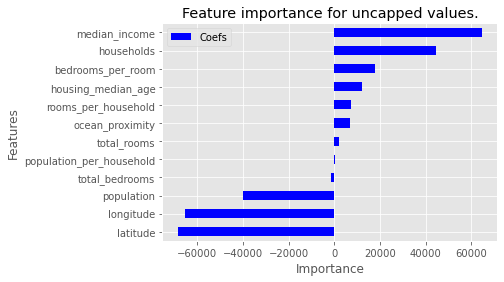

In [35]:
from matplotlib.pyplot import figure
figure()
# Creating a horizontal graph with the values from the pandas Series.

coef_table_sorted.plot.barh(x='Features', y='Coefs', color="blue")
plt.title("Feature importance for uncapped values.")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

1) It can be seen that among all the features the income has the highest positive signifcance, followed by the households snd bedrooms per room numbers. These are expected, as higher salaries correlate with buying more expensive houses, while larger households and larger amount of bedrooms per rooms imply the larger properties and thus, higher prices as well.

2) Interestingly, the strong negative coefficients are noticed for the longtitude, lattitude and the price. By ananlyzing and visualizing that, it can be seen that the more north and the east the direction on the map the cheaper the houses are. By looking at the map of Califronia from part1 explanatory data analysis, it can be seen that this direction represents exactly the moving more into continental part of the state and away from teh coastal line. So this interetsing finsing highlights that.

3) Another strong negative realtionship was observed for the population, which can be explained by the fact that the lower the population in the area the higher the price, as it can be considered a more private area.

4) Interestingly, the small positive correlation was found for the house age and price, which contradicts with the expected result. As the newer houses were predicted to be more expensive. Most probably, those houses which are older, are placed in the favorbale and popular locations, and location as we observed plays an important role in defining the house price and this effect overpasses the age factor.

5) Although the location is important it might be difficult to interpret the ocean proximity in this dataset as they are assigned as different numbers. One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, “excellent”), this was done for ocean proximity as well by asssigning numerical values to ocean proximity in the gradient order: the lower the number the further away is the house from the ocean. This gradient is chosen for the better and easier interpretation of models results (feature importances). Still it can be seen that the small positive coefficient indicates that with closer proximity to ocean increases the housing prices. For the future work and easier representation what can be done is to use a common solution to create one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on.This can be studied further.

## Extract only important features and run again LinReg

To evaluate the performance of the Linear Regression model from the different perspective the only important features observed above will be considered in the next part. So that "total_rooms", "total_bedrooms", "ocean_proximity", "population_per_household" will be dropped.

In [36]:
housing_new = housing.drop(["total_rooms", "total_bedrooms", "ocean_proximity", "population_per_household"], axis=1) # drop labels for training set
housing_new

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_room
2736,1.987142,-1.326644,1.738389,-0.516708,-0.595592,-1.281953,-0.299836,-0.005576
17659,-1.162709,0.760676,0.376473,-0.135922,0.053373,0.314878,0.141273,-0.627446
17654,-1.167700,0.746729,-0.584880,-0.358646,-0.461596,1.042040,0.482095,-0.804145
17544,-1.157717,0.788569,1.898615,-0.750208,-0.771628,-0.640321,0.135746,-0.548183
8772,0.604403,-0.857113,0.376473,-0.406244,-0.272424,0.917820,0.077517,-0.019626
...,...,...,...,...,...,...,...,...
11575,0.774125,-0.871060,-0.024091,-0.255367,-0.117408,-0.096730,-0.043408,-0.094825
18228,-1.267537,0.821111,-0.825218,-0.540058,-0.225131,-0.057526,-0.834789,1.859945
5425,0.564468,-0.754839,0.456585,-0.418817,-0.230385,0.836012,0.033308,-0.298237
12799,-0.948059,1.378969,0.296360,0.062553,0.308229,-1.682525,-0.656423,0.640393


In [37]:
housing_t_new = housing_t.drop(["total_rooms", "total_bedrooms", "ocean_proximity", "population_per_household"], axis=1) # drop labels for training set
housing_t_new

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_room
11212,0.819052,-0.847816,0.056022,-0.360442,-0.603475,-0.821518,-0.014201,0.191714
10317,0.863978,-0.838518,-0.264429,-0.685546,-0.745354,4.148312,1.334104,-1.785296
5086,0.634354,-0.773435,1.498051,-0.590350,-0.745354,-0.913400,-0.635847,0.145201
7988,0.684272,-0.833869,0.777036,0.877110,0.870491,0.016069,-0.480259,0.437442
14480,1.148513,-1.312698,-0.745106,0.299646,0.589360,2.654206,0.874967,-1.230914
...,...,...,...,...,...,...,...,...
385,-1.367374,1.048903,1.658276,-0.775354,-0.695433,-0.212608,0.035831,-0.517495
11924,1.078627,-0.787381,0.536698,-0.645133,-0.561436,0.295372,0.098349,-0.656517
13047,-0.863198,1.351076,0.536698,3.094466,2.026542,-0.620174,0.098766,-0.606578
10331,0.888937,-0.838518,-1.866684,0.425377,0.631398,1.965157,0.255587,-0.909643


In [38]:
%%time
lin_reg1 = LinearRegression()
lin_reg1.fit(housing_new, housing_labels)


Wall time: 7.98 ms


LinearRegression()

In [39]:
%%time
housing_pred1 = lin_reg1.predict(housing_t_new)

Wall time: 2.99 ms


In [40]:
lin_mse1 = mean_squared_error(housing_labels_t, housing_pred1)
lin_rmse1 = np.sqrt(lin_mse1)
lin_rmse1

60331.579028808505

Evaluating the RMSE and comparing with the previous value, it can be seen that the difference is not large. It is very slightly smaller, but this is not very impactful. So other strategies should be applied to reduce RMSE.

In [41]:
lin_mae1 = mean_absolute_error(housing_labels_t, housing_pred1)
lin_mae1

43981.44595369389

Same for the MAE, validation score, confidence score values, where the difference is insignificant.

In [42]:
lin_scores1 = cross_val_score(lin_reg1, housing_new, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores1 = np.sqrt(-lin_scores1)
display_scores(lin_rmse_scores1)

Scores: [60304.87036293 58083.27990669 59150.13562882 58203.46485867
 59287.11490806 63095.23743619 59146.8350521  57077.83518689
 62423.85937987 61133.19822186]
Mean: 59790.58309420858
Standard deviation: 1838.2841314883449


In [43]:
lr_confidence1 = lin_reg1.score(housing_t_new, housing_labels_t)
print("lr confidence: ", lr_confidence1)

lr confidence:  0.6107569143167793


Feature: 0, Score: -76673.65838
Feature: 1, Score: -80294.21272
Feature: 2, Score: 12492.03154
Feature: 3, Score: -40811.29850
Feature: 4, Score: 45795.33853
Feature: 5, Score: 64850.15737
Feature: 6, Score: 7963.26425
Feature: 7, Score: 17806.06195


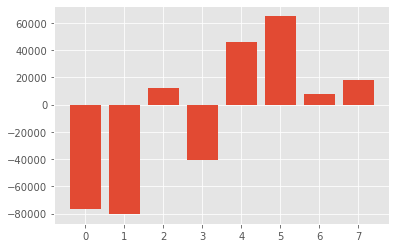

In [44]:
importance_lr1 = lin_reg1.coef_
# summarize feature importance
for i,v in enumerate(importance_lr1):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_lr1))], importance_lr1)
plt.show()

In [45]:
coef_table1 = pd.DataFrame(list(housing_new.columns)).copy()
coef_table1.columns = ['Features']
coef_table1.insert(len(coef_table1.columns),"Coefs",lin_reg1.coef_.transpose())
coef_table1

,Features,Coefs
0,longitude,-76673.658384
1,latitude,-80294.212723
2,housing_median_age,12492.031542
3,population,-40811.298496
4,households,45795.338525
5,median_income,64850.157373
6,rooms_per_household,7963.264248
7,bedrooms_per_room,17806.061947


In [46]:
coef_table_sorted1=coef_table1.sort_values(by='Coefs')

<Figure size 432x288 with 0 Axes>

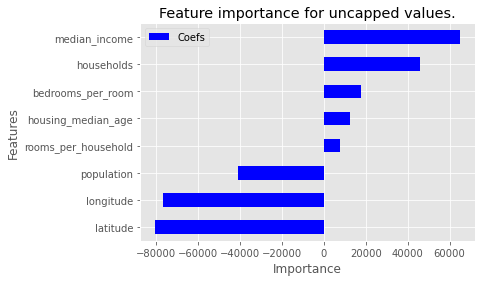

In [47]:
figure()
# Creating a horizontal graph with the values from the pandas Series.

coef_table_sorted1.plot.barh(x='Features', y='Coefs', color="blue")
plt.title("Feature importance for uncapped values.")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

Generally, the coefficients stayed the same as in the previous case, and the perfromance of the model was not improved significantly.

## Lasso, Ridge or Elastic Net

As the results were not improved much, the other related regression models woul be tested like Lasso, Ridge and Elastic Net and their optimized results will be compared with the Linear Regression.

## Ridge

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)). In Ridge Regression, the OLS loss function is augmented in such a way that we not only minimize the sum of squared residuals but also penalize the size of parameter estimates, in order to shrink them towards zero.

L2 regularization (Ridge) - better for dense data.

In [48]:
%%time

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(housing, housing_labels)


Wall time: 22.9 ms


Ridge(alpha=1)

In [49]:
%%time
housing_pred_r = ridge.predict(housing_t)

Wall time: 11 ms


Ridge has an alpha parameter that can be optimized and grisdearch will be used for that. Alpha represents the regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization. 

In [50]:
from sklearn.model_selection import GridSearchCV

#Grid Search
clf = Ridge()
grid_values = {'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring='neg_mean_squared_error',cv=5)
grid_clf_acc.fit(housing, housing_labels)

print(grid_clf_acc.best_estimator_)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(housing_t)

Ridge(alpha=10)


It can be seen that the results are similar to Linear Regression model for MSE (alpha=1).

In [51]:
lin_mse_r = mean_squared_error(housing_labels_t, housing_pred_r)
lin_rmse_r = np.sqrt(lin_mse_r)
lin_rmse_r

60040.1684132027

For optimized alpha=10, RMSE also doesnt show much improvement

In [52]:
lin_mse_r1 = mean_squared_error(housing_labels_t, y_pred_acc) #alpha=10
lin_rmse_r1 = np.sqrt(lin_mse_r1)
lin_rmse_r1

60003.85385172996

The case is the same for MAE

In [53]:
lin_mae_r = mean_absolute_error(housing_labels_t, housing_pred_r)
lin_mae_r

43726.67464042608

In [54]:
lin_mae_r1 = mean_absolute_error(housing_labels_t, y_pred_acc) #alpha=10
lin_mae_r1

43721.69227357125

Looking at the other metrics, again no large improvements are noticed compared to baseline Linear Regression.

In [55]:
lin_scores_r = cross_val_score(ridge, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores_r = np.sqrt(-lin_scores_r)
display_scores(lin_rmse_scores_r)

Scores: [59929.96686912 57971.89657206 59154.21430679 58009.47046736
 59143.13177547 62913.65613139 59456.80180703 56841.230097
 62182.09309969 61080.90356989]
Mean: 59668.33646958027
Standard deviation: 1819.946483970337


In [56]:
lr_confidence_r = ridge.score(housing_t, housing_labels_t)
print("lr confidence: ", lr_confidence_r)

lr confidence:  0.6145080386232176


Feature: 0, Score: -65245.71365
Feature: 1, Score: -68439.50950
Feature: 2, Score: 12179.27662
Feature: 3, Score: 1855.03553
Feature: 4, Score: -1279.36314
Feature: 5, Score: -39752.62891
Feature: 6, Score: 44318.15749
Feature: 7, Score: 64701.40350
Feature: 8, Score: 6882.80756
Feature: 9, Score: 7372.28617
Feature: 10, Score: 17637.73666
Feature: 11, Score: 307.64700


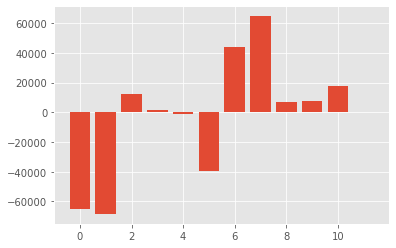

In [57]:
importance_r1 = ridge.coef_
# summarize feature importance
for i,v in enumerate(importance_r1):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_r1))], importance_r1)
plt.show()

In [58]:
coef_table_r = pd.DataFrame(list(housing.columns)).copy()
coef_table_r.columns = ['Features']
coef_table_r.insert(len(coef_table_r.columns),"Coefs",ridge.coef_.transpose())
coef_table_r

,Features,Coefs
0,longitude,-65245.713648
1,latitude,-68439.509501
2,housing_median_age,12179.276621
3,total_rooms,1855.035527
4,total_bedrooms,-1279.363141
5,population,-39752.628908
6,households,44318.157490
7,median_income,64701.403500
8,ocean_proximity,6882.807558
9,rooms_per_household,7372.286168


In [59]:
coef_table_sorted_r=coef_table_r.sort_values(by='Coefs')

<Figure size 432x288 with 0 Axes>

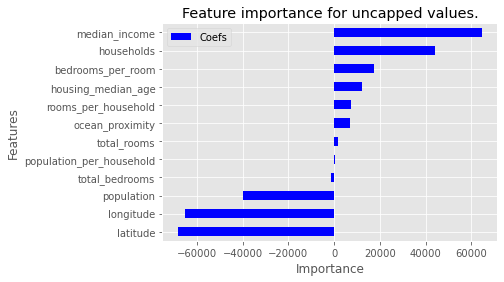

In [60]:
figure()
# Creating a horizontal graph with the values from the pandas Series.

coef_table_sorted_r.plot.barh(x='Features', y='Coefs', color="blue")
plt.title("Feature importance for uncapped values.")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

Generally, the coefficients stayed the same as in the Linear Regression case, and the perfromance of the model was not improved significantly.

## Lasso

Lasso, or Least Absolute Shrinkage and Selection Operator, is quite similar conceptually to ridge regression. It also adds a penalty for non-zero coefficients, but unlike ridge regression which penalizes sum of squared coefficients (the so-called L2 penalty), lasso penalizes the sum of their absolute values (L1 penalty). As a result, for high values of λ, many coefficients are exactly zeroed under lasso, which is never the case in ridge regression.

Linear Model trained with L1 prior as regularizer (aka the Lasso).

L1 regularization (Lasso) - better for sparse data.

In [61]:
%%time
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=1)
lasso.fit(housing, housing_labels)


Wall time: 55.9 ms


Lasso(alpha=1)

In [62]:
%%time
housing_pred_l = lasso.predict(housing_t)

Wall time: 4.98 ms


Similarly to Ridge, Lasso also has an alpha parameter that can be optimized and grisdearch will be used for that. Alpha is a constant that multiplies the L1 term. Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object. 

In [63]:
from sklearn.model_selection import GridSearchCV

#Grid Search
clf2 = linear_model.Lasso()
grid_values2 = {'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
grid_clf_acc2 = GridSearchCV(clf2, param_grid = grid_values2, scoring='neg_mean_squared_error',cv=5)
grid_clf_acc2.fit(housing, housing_labels)

print(grid_clf_acc2.best_estimator_)

#Predict values based on new parameters
y_pred_acc2 = grid_clf_acc2.predict(housing_t)

Lasso(alpha=100)


Again, checking all the same metrics for Lasso, no large differences are observed for the baseline Linear Regression and Lasso for both alpha=1 and optimized alpha=100.

In [64]:
lin_mse_l = mean_squared_error(housing_labels_t, housing_pred_l)
lin_rmse_l = np.sqrt(lin_mse_l)
lin_rmse_l

60042.333511764125

In [65]:
lin_mse_l2 = mean_squared_error(housing_labels_t, y_pred_acc2)
lin_rmse_l2 = np.sqrt(lin_mse_l2)
lin_rmse_l2

59913.01351960299

In [66]:
lin_mae_l = mean_absolute_error(housing_labels_t, housing_pred_l)
lin_mae_l

43727.02445179428

In [67]:
lin_mae_l2 = mean_absolute_error(housing_labels_t, y_pred_acc2)
lin_mae_l2

43705.380572688926

In [68]:
lin_scores_l = cross_val_score(lasso, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores_l = np.sqrt(-lin_scores_l)
display_scores(lin_rmse_scores_l)

Scores: [59930.69937818 57972.57458603 59152.93689005 58008.90571581
 59142.16076074 62915.22463065 59457.5325315  56840.95499205
 62181.02299793 61080.32042443]
Mean: 59668.23329073653
Standard deviation: 1820.1304874514985


In [69]:
lin_scores_l2 = cross_val_score(grid_clf_acc2, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores_l2 = np.sqrt(-lin_scores_l2)
display_scores(lin_rmse_scores_l2)

Scores: [59935.00979823 57974.09293062 59197.27863431 58010.44024959
 59135.89543711 62835.14622102 59277.33190105 56867.59887748
 62178.23952581 61097.23918029]
Mean: 59650.827275551645
Standard deviation: 1804.4277450436587


In [70]:
lr_confidence_l = lasso.score(housing_t, housing_labels_t)
print("lr confidence: ", lr_confidence_l)

lr confidence:  0.6144802357984832


In [71]:
lasso2 = linear_model.Lasso(alpha=100)
lasso2.fit(housing, housing_labels)
lr_confidence_l2 = lasso2.score(housing_t, housing_labels_t)
print("lr confidence: ", lr_confidence_l2)

lr confidence:  0.6161391227983551


Feature: 0, Score: -65333.28580
Feature: 1, Score: -68530.52052
Feature: 2, Score: 12174.46269
Feature: 3, Score: 1834.46454
Feature: 4, Score: -1287.06611
Feature: 5, Score: -39777.54870
Feature: 6, Score: 44367.77468
Feature: 7, Score: 64696.21776
Feature: 8, Score: 6860.09918
Feature: 9, Score: 7382.06989
Feature: 10, Score: 17633.84948
Feature: 11, Score: 309.39970


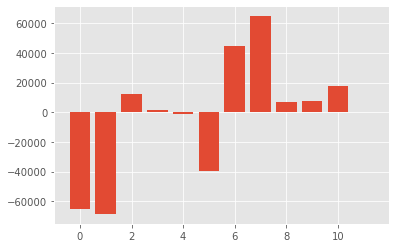

In [72]:
importance_las = lasso.coef_
# summarize feature importance
for i,v in enumerate(importance_las):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_las))], importance_las)
plt.show()

In [73]:
coef_table_l = pd.DataFrame(list(housing.columns)).copy()
coef_table_l.columns = ['Features']
coef_table_l.insert(len(coef_table_l.columns),"Coefs",lasso.coef_.transpose())
coef_table_l

,Features,Coefs
0,longitude,-65333.285800
1,latitude,-68530.520521
2,housing_median_age,12174.462688
3,total_rooms,1834.464543
4,total_bedrooms,-1287.066108
5,population,-39777.548704
6,households,44367.774679
7,median_income,64696.217761
8,ocean_proximity,6860.099183
9,rooms_per_household,7382.069894


In [74]:
coef_table_sorted_l=coef_table_l.sort_values(by='Coefs')

<Figure size 432x288 with 0 Axes>

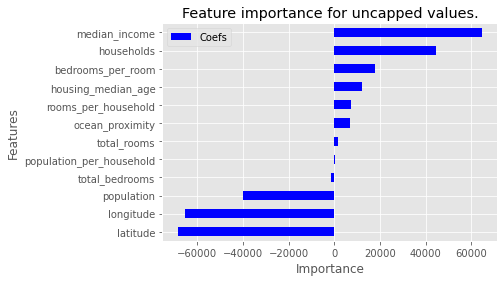

In [75]:
figure()
# Creating a horizontal graph with the values from the pandas Series.

coef_table_sorted_l.plot.barh(x='Features', y='Coefs', color="blue")
plt.title("Feature importance for uncapped values.")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

## Elastic Net

Elastic Net first emerged as a result of critique on lasso, whose variable selection can be too dependent on data and thus unstable. The solution is to combine the penalties of ridge regression and lasso to get the best of both worlds.

So it is a linear regression with combined L1 and L2 priors as regularizer.

In [76]:
%%time
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=1) #l1_ratio=0.5
en.fit(housing, housing_labels)


Wall time: 25.9 ms


ElasticNet(alpha=1)

In [77]:
%%time
housing_pred_en = en.predict(housing_t)

Wall time: 7.98 ms


There are two parameters that can be optimized: l1_ratio and alpha. Alpha is a constant that multiplies the penalty terms. Defaults to 1.0. See the notes for the exact mathematical meaning of this parameter. alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object. The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

In [78]:
#Grid Search
clf3 = ElasticNet()
grid_values3 = {'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100], 'l1_ratio': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]}
grid_clf_acc3 = GridSearchCV(clf3, param_grid = grid_values3, scoring='neg_mean_squared_error',cv=5)
grid_clf_acc3.fit(housing, housing_labels)

print(grid_clf_acc3.best_estimator_)

#Predict values based on new parameters
y_pred_acc3 = grid_clf_acc3.predict(housing_t)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81684679822.30469, tolerance: 11651986916.639364
  model = cd_fast.enet_coordinate_descent(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141965728218.40625, tolerance: 11530568247.972975
  model = cd_fast.enet_coordinate_descent(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308807440601.27344, tolerance: 11591720858.26927
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=100, l1_ratio=1)


Checking the RMSE for Elastic Net with alpha=1 and l1_ratio=0.5, it can be seen that the erros is increased for this case compared to baseline Linear Regression, meaning its performing even worse than LinReg.

Moreover, using the optimized parameter alpha=100 and l1_ratio =0.5 (not 1, as found by the gridsearch, otherwise assigning to 1 will run the same model as Lasso previously, that has already been tested). The results of these parameters are even worse, meaning that the model with these parameters is not the optimal for this task.

In [79]:
lin_mse_en = mean_squared_error(housing_labels_t, housing_pred_en)
lin_rmse_en = np.sqrt(lin_mse_en)
lin_rmse_en #l1_ratio=0.5, alpha =1

67663.13723342067

In [80]:
en1 = ElasticNet(alpha=100) #l1_ratio=0.5
en1.fit(housing, housing_labels)
housing_pred_en1 = en1.predict(housing_t)
lin_mse_en1 = mean_squared_error(housing_labels_t, housing_pred_en1)
lin_rmse_en1 = np.sqrt(lin_mse_en1)
lin_rmse_en1 #l1_ratio=0.5

95408.18548990646

Checking the rest of the parameters, it can be observed that the performance of ElasticNet model is siginifcantly lower than the baseline Linear Regression.

In [81]:
lin_mae_en = mean_absolute_error(housing_labels_t, housing_pred_en)
lin_mae_en

52149.18902748306

In [82]:
lin_scores_en = cross_val_score(en, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores_en = np.sqrt(-lin_scores_en)
display_scores(lin_rmse_scores_en)

Scores: [68603.3576383  67310.04072485 67202.58343374 67062.06406741
 68048.90385297 69377.56120271 68598.69834754 66488.56467723
 70373.2177485  68779.95554504]
Mean: 68184.49472382796
Standard deviation: 1131.3149092085837


In [83]:
lr_confidence_en = en.score(housing_t, housing_labels_t)
print("lr confidence: ", lr_confidence_en)

lr confidence:  0.5104063425434365


In [84]:
coef_table_en = pd.DataFrame(list(housing.columns)).copy()
coef_table_en.columns = ['Features']
coef_table_en.insert(len(coef_table_en.columns),"Coefs",en.coef_.transpose())
coef_table_en

,Features,Coefs
0,longitude,-7416.198089
1,latitude,-9748.173699
2,housing_median_age,8087.802726
3,total_rooms,3616.649477
4,total_bedrooms,3712.929358
5,population,-5886.239248
6,households,5201.610213
7,median_income,39415.246218
8,ocean_proximity,19053.647354
9,rooms_per_household,1775.901308


Feature: 0, Score: -7416.19809
Feature: 1, Score: -9748.17370
Feature: 2, Score: 8087.80273
Feature: 3, Score: 3616.64948
Feature: 4, Score: 3712.92936
Feature: 5, Score: -5886.23925
Feature: 6, Score: 5201.61021
Feature: 7, Score: 39415.24622
Feature: 8, Score: 19053.64735
Feature: 9, Score: 1775.90131
Feature: 10, Score: 1139.94031
Feature: 11, Score: -1439.87329


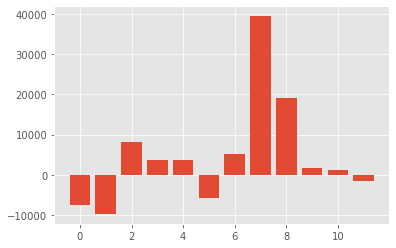

In [85]:
importance_en = en.coef_
# summarize feature importance
for i,v in enumerate(importance_en):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_en))], importance_en)
plt.show()

In [86]:
coef_table_sorted_en=coef_table_en.sort_values(by='Coefs')

<Figure size 432x288 with 0 Axes>

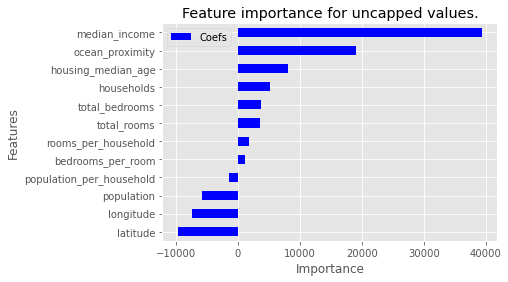

In [87]:
figure()
# Creating a horizontal graph with the values from the pandas Series.

coef_table_sorted_en.plot.barh(x='Features', y='Coefs', color="blue")
plt.title("Feature importance for uncapped values.")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

The changes in features coefficients can be seen in this case. Where all of them had the decreased absolute values. However, as this model performs worse than the baseline Linear Regression, it would not be recommended to use this less reliable model.

# Summary

Running the same code on the dataset without capped data helped to improve the RMSE by alsmot USD 10,000, which is quite significant. The effect can be explained by the fact that removing these capped values, the model was trained better and thus perfomed better, as these capped values, significantly affected the patterns and distribution of the values (so that line in prices USD 500,000 was observed in Part 1 Expalanatory data analysis). Thus, these values probably prevented the good generalization of modeling before.